In [1]:
from AutoObst import AutoFemurLoc
import pydicom
from matplotlib import pyplot as plt

# Cargamos los datos y los mostramos
filename = 'IM17.dcm'
ds = pydicom.dcmread(filename)
print(f"Patient's Name: {ds.PatientName}")
print(f"Patient ID: {ds.PatientID}")
print(f"Modality: {ds.Modality}")
print(f"Study Date: {ds.StudyDate}")
pixel_spacing = ds.PixelSpacing
row_spacing, column_spacing = pixel_spacing
print(f"Row Spacing (mm): {row_spacing}")
print(f"Column Spacing (mm): {column_spacing}")

Patient's Name: BRAVO FLORES^EYERAHI
Patient ID: D19158-17-10-02-1
Modality: US
Study Date: 20180130
Row Spacing (mm): 0.121614
Column Spacing (mm): 0.121614


## Mostramos la imagen original

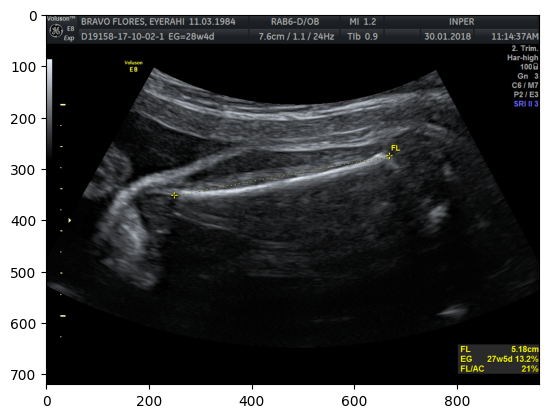

In [6]:
# Accedemos a la informacion de la imagen para iniciar el procesamiento
image_data = ds.pixel_array
plt.imshow(image_data, cmap='gray')

## Creamos el objeto AutoObst


In [3]:
# Creamos el objeto con valores predetermindos
myObst = AutoFemurLoc()
end_points = myObst.findFemur(image_data)
# Utilizamos los puntos con la compensación de pixeles
end_point = end_points[2]

## Mostramos los extremos del femur en la imagen

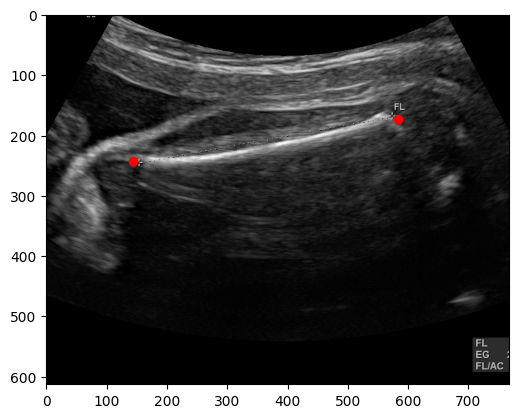

In [4]:
# pasamos la imagen original y la pareja de puntos que queremos mostrar
myObst.set_markers(image_data,end_point)

## Calculamos la medicion en milimetros y la desplegamos

In [5]:
# Usamos la funcion meassure_length
meassure_mm = myObst.meassure_length(row_spacing,end_point)
print(f'La medicion de la longitud del fémur en mm es: {meassure_mm:.2f} mm')

La medicion de la longitud del fémur en mm es: 54.20 mm
